<h1 style="background-color: #4CAF50; color: #f2f2f2; text-align: center; padding: 20px;">ANALYSIS OF HEALTH INSURANCE COST</h1>


# Overview of the data

The majority of the countries finalize health insurance costs based on many factors such as age, number of people in families, etc. What should be the actual health insurance price for an individual or a family is an issue for many companies. Hence, one insurance company hired you as a data scientist to predict the health insurance cost for possible future customers. They have already collected samples required to perform all data analysis and machine learning tasks. Your task is to perform all data analysis steps and finally create a machine learning model which can predict the health insurance cost.

# Dataset Description

- age: age of the primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body Mass Index, providing an understanding of body weights that are relatively high or low relative to height, objective index of body weight (kg/m²) using the ratio of height to weight, ideally 18.5 to 24.9

- children: number of children covered by health insurance, number of dependents

- smoker: smoking or not

- region: the beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

- health_insurance_cost: individual medical costs billed by health insurance

<div style="background-color: #FFD700; color: #000; padding: 20px;">
    <h2 style="text-align: center;">Section 2 - Data Analysis</h2>
</div>


# Question1-
What approach are you going to take to prove or disprove your hypothesis?

# Reason For taking Gradient Boosting Regressor as the Primary model
1-Gradient Boosting Regression is an ensemble learning method that combines multiple weak learners (decision trees) sequentially. It builds trees one at a time, where each new tree corrects the errors made by the previous ones. This iterative approach tends to improve prediction accuracy.

2-Gradient Boosting Regression is less sensitive to outliers compared to linear regression. It builds trees iteratively, and each tree focuses on correcting the errors made by previous trees. Therefore, outliers have less influence on the final predictions.

3-Gradient Boosting Regression can capture complex non-linear relationships between features and the target variable. It constructs decision trees to partition the feature space into regions, allowing it to model non-linear relationships more effectively than linear models.

4-Gradient Boosting Regression includes regularization techniques like shrinkage (learning rate) and tree pruning to prevent overfitting. This helps generalize well to unseen data and reduces the risk of overfitting, especially in high-dimensional datasets.

# Ways to prove my Null Hypothesis
1-Choosing the appropriate evaluation metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), or R-squared to measure the performance of each model.

2-Besides Gradient Boosting, include other regression models such as Linear Regression, Random Forest, Decision Tree, Support Vector Regression (SVR), and XGBoost for comparison.

3-Performing the necessary data preprocessing steps including handling missing values, encoding categorical variables, and scaling numerical features.

4-Training each regression model on the preprocessed data using default hyperparameters.

5-Evaluating the performance of each model using the chosen evaluation metrics.

6-Perform hyperparameter tuning using techniques like grid search to optimize the performance of each model.

7-Compare the performance metrics of each model to determine which one performs the best on the given health insurance dataset.

# Question2-
What feature engineering techniques will be relevant to your project?

- Handling missing values: Identifing and handling the missing values, Like in the given dataset there were missing values such as-["age","BMI","health_insurance_price"].Hence Filling them with mean(after fixing the outliers)


- Outliers Detection-Checking for outliers using the boxplot got my attention as this dataset had outliers for columns like-["BMI","health_insurance_price"]. Hence using the capping technique to fix the outliers so that the data doesn't becomes noisy and becomes workable for the analysis


- Data Analysis/Data Exploration-By checking or  analyzing each column with respect to the target column help us to come into certain conclusion or provide some beneficial information which will help us to take decision in a wise way.


- Encoding Technique-Performing encoding technique like-pd.get_dummies for the columns like- ["gender","smoking_status","location"] helped me to convert the categorical data to numerical data so that it is readable by the computer for ML process


- Scaling the values-After the data converted into numerical columns it becomes very important to scale the data using - standard scaler or Minmax Scaler( in my case i have used Standard Scaler) so that there is no much difference in number while preparing it for training and testing


# Question 3 & 4
Justify your data analysis approach.

Identify essential patterns in your data using the EDA approach to justify your findings.

In [1]:
#importing important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install openpyxl-if not able to open excel file

#Loading the Excel Dataset
df=pd.read_excel("Health_insurance_cost.xlsx")
df.head(2)


#Getting the basic information of the dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


# Data Exploration

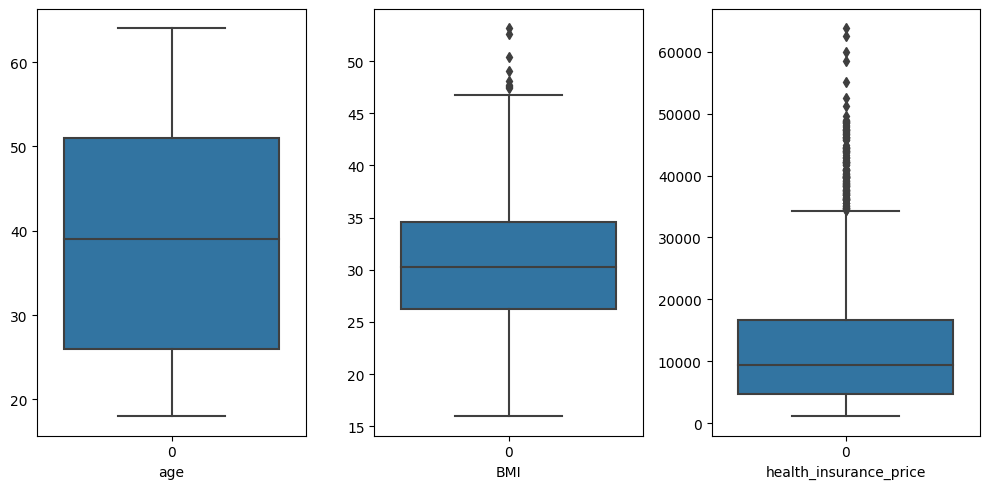

In [2]:
#Checking for outliers
vals=["age","BMI","health_insurance_price"]
fig,axes=plt.subplots(1,len(vals),figsize=(10,5))

for i ,feature in enumerate(vals):
    sns.boxplot(df[feature],ax=axes[i])
    axes[i].set_xlabel(feature)
    
plt.tight_layout()
plt.show()


#Outliers in ["BMI","health_insurance_price"]


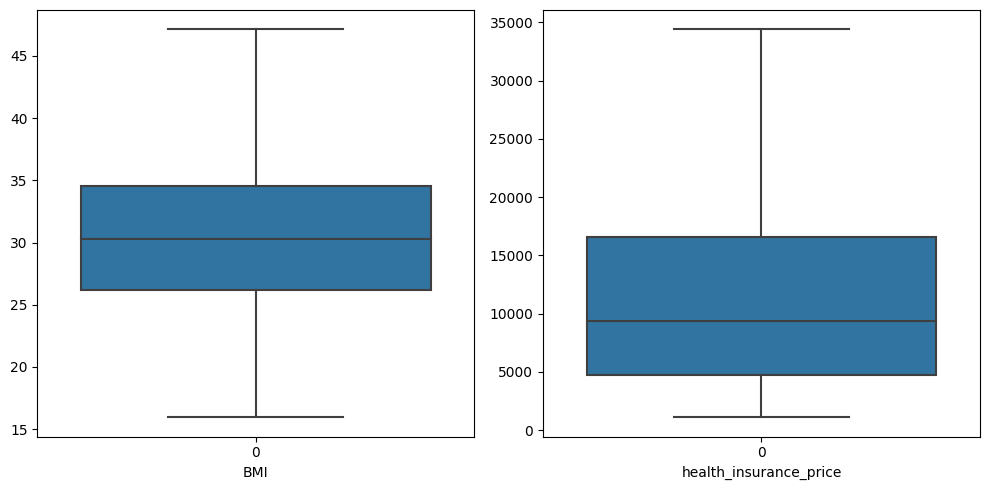

In [3]:
#Fixing the Outliers

for feature in ["BMI","health_insurance_price"]:
    q1=df[feature].quantile(.25)
    q3=df[feature].quantile(.75)
    iqr=q3-q1
    
    lower_lim=q1-(1.5)*iqr
    upper_limit=q3+(1.5)*iqr
    
    df[feature]=df[feature].clip(lower_lim,upper_limit)

#Checking for outliers
vals=["BMI","health_insurance_price"]
fig,axes=plt.subplots(1,len(vals),figsize=(10,5))

for i ,feature in enumerate(vals):
    sns.boxplot(df[feature],ax=axes[i])
    axes[i].set_xlabel(feature)
    
plt.tight_layout()
plt.show()


In [4]:
#Finding the missing values
df.isnull().sum()

#missing value cols=["age","BMI","health_insurance_price"]

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [5]:
#filling the missing values
df["age"]=df["age"].fillna(df["age"].mean())
df["BMI"]=df["BMI"].fillna(df["BMI"].mean())
df["health_insurance_price"]=df["health_insurance_price"].fillna(df["health_insurance_price"].mean())

In [6]:
df.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [7]:
df.head(2)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.623559,0,yes,southwest,16884.9240
1,18.0,male,33.770000,1,no,southeast,1725.5523


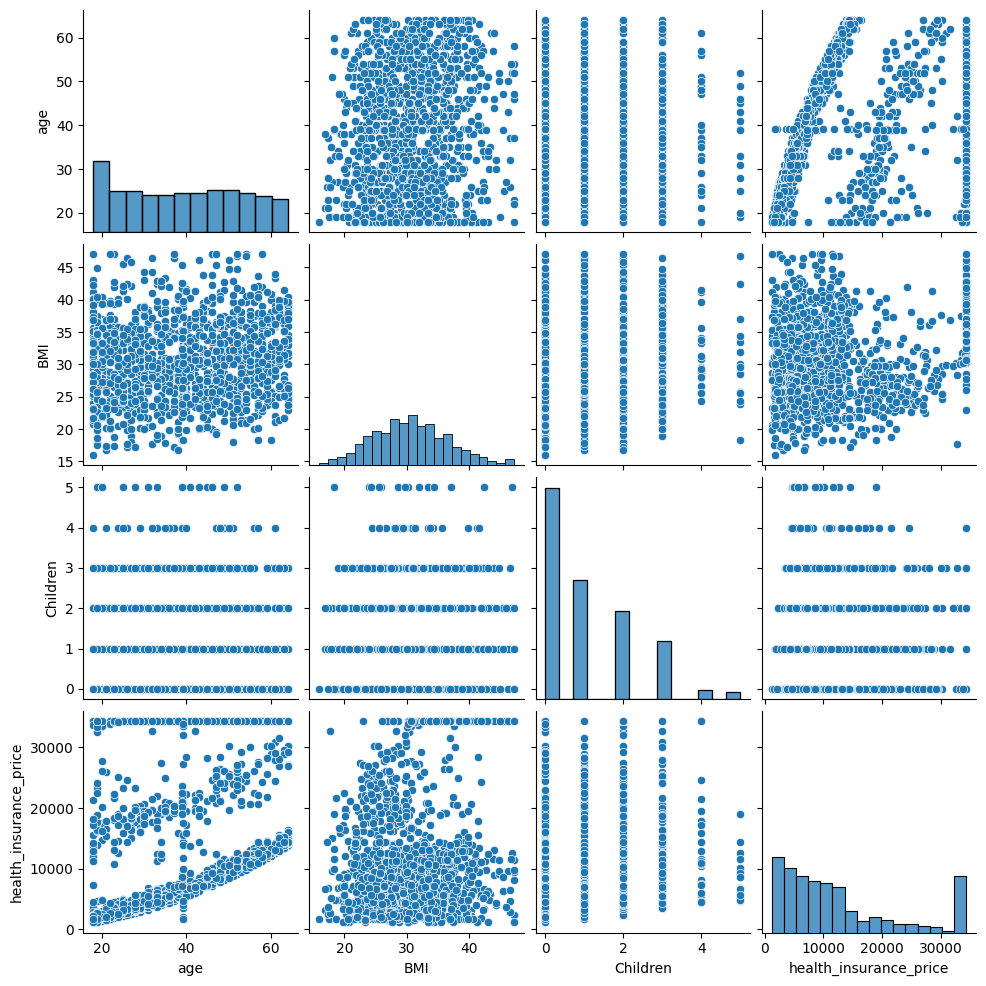

In [8]:
# Creating a pair plot for numerical features
numerical_cols = ['age', 'BMI', 'Children', 'health_insurance_price']

sns.pairplot(df[numerical_cols])
plt.show()


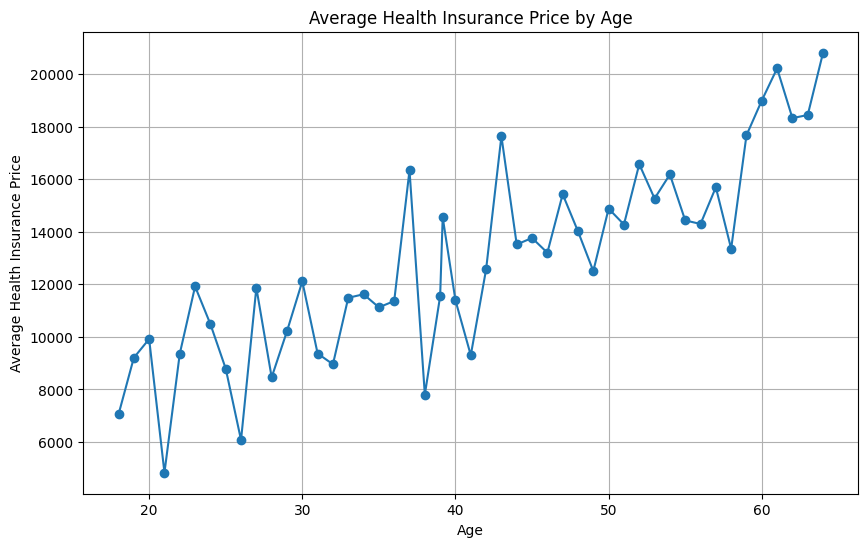

In [9]:
#Checking as per the age what will be the health_insurance_price
average_price_by_age = df.groupby('age')['health_insurance_price'].mean()

# Plot the line plot
plt.figure(figsize=(10, 6))
plt.plot(average_price_by_age.index, average_price_by_age.values, marker='o', linestyle='-')
plt.title('Average Health Insurance Price by Age')
plt.xlabel('Age')
plt.ylabel('Average Health Insurance Price')
plt.grid(True)
plt.show()

In [10]:
#Lets us check the mean BMI

df["BMI"].mean() # 30.623558935361217

30.623558935361217

<AxesSubplot: xlabel='BMI', ylabel='Count'>

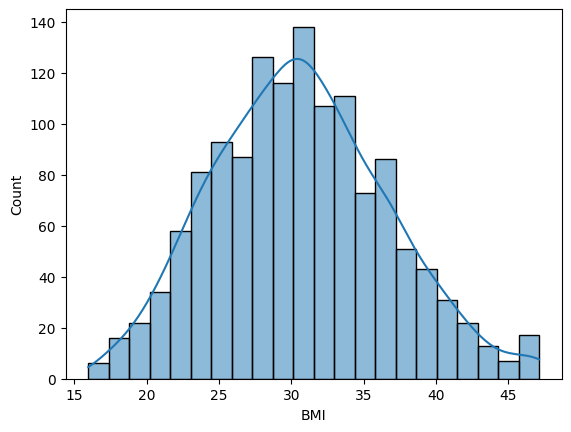

In [11]:
#Exploring the BMI using histogram to see the distribution of the BMI
sns.histplot(df["BMI"],kde=True)

#Hence we can see the BMI is normally Distributed with a mean of 30 approx

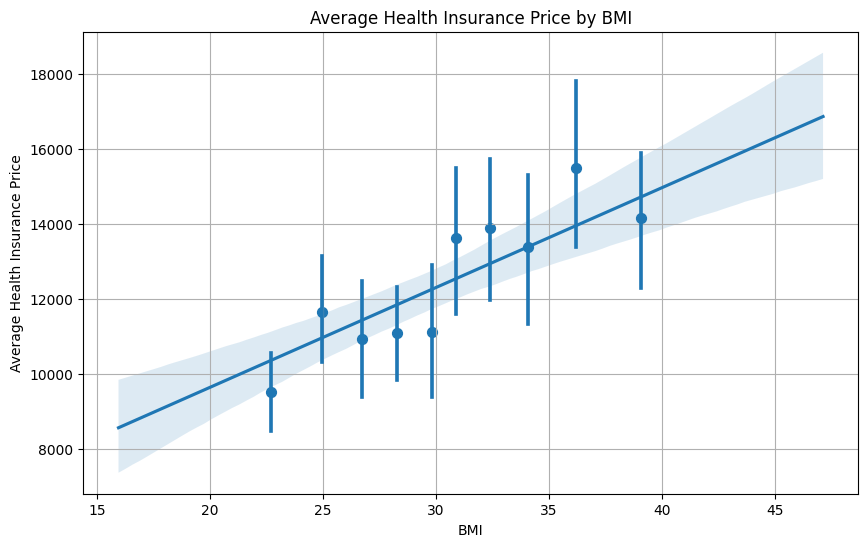

In [12]:
#Using the Line plot we can check the relationship of BMI with the Health_insurance_price

average_price_by_age = df.groupby('BMI')['health_insurance_price'].mean()

# Plot the line plot
plt.figure(figsize=(10, 6))
sns.regplot(data=df,x=df["BMI"],y=df["health_insurance_price"],x_bins=10)
plt.title('Average Health Insurance Price by BMI')
plt.xlabel('BMI')
plt.ylabel('Average Health Insurance Price')
plt.grid(True)
plt.show()

In [13]:
#Correlation of BMI with Health_insurance_cost
df[["BMI","health_insurance_price"]].corr()

,BMI,health_insurance_price
BMI,1.000000,0.157942
health_insurance_price,0.157942,1.000000


In [14]:
#Exploring the gender column

df["gender"].value_counts()

#male      676
#female    662

male      676
female    662
Name: gender, dtype: int64

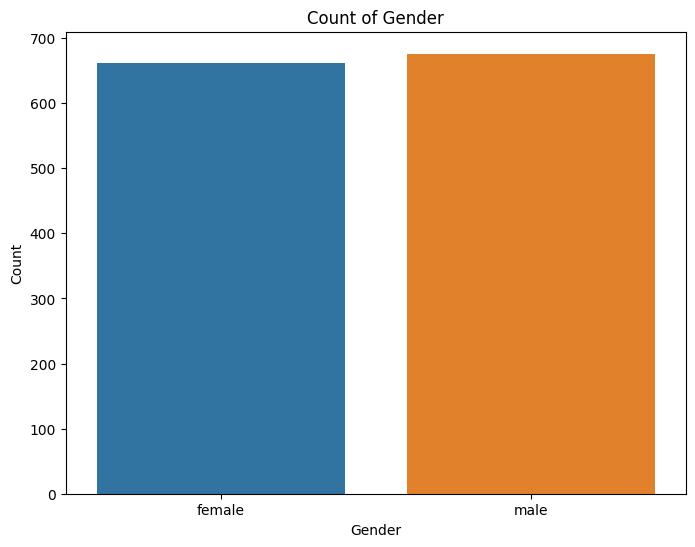

In [15]:
#count plot for gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender')
plt.title(f'Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

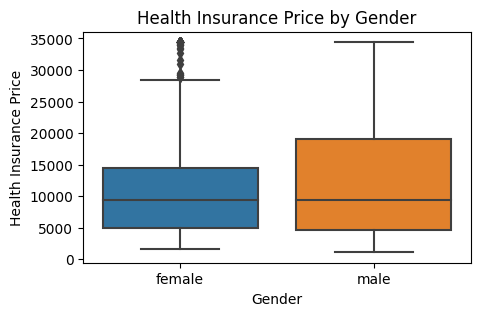

In [16]:
# Using a box plot to visualize the distribution of health insurance price by gender
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='gender', y='health_insurance_price')
plt.title('Health Insurance Price by Gender')
plt.xlabel('Gender')
plt.ylabel('Health Insurance Price')
plt.show()

In [17]:
#Exploring Children -Count of children
df["Children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: Children, dtype: int64

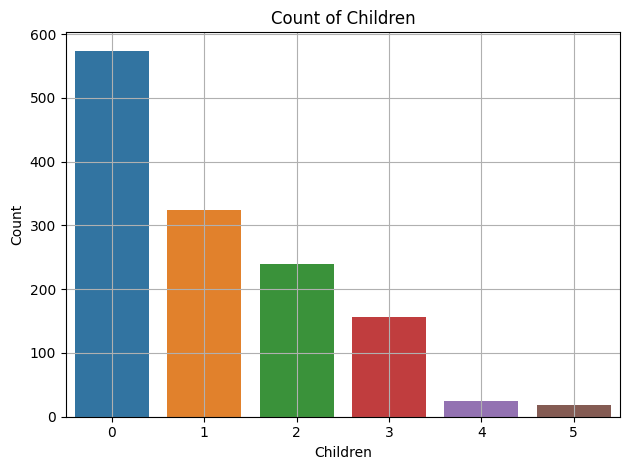

In [18]:
#Count of children using graph

sns.countplot(data=df,x="Children")
plt.xlabel("Children")
plt.ylabel("Count")
plt.title("Count of Children")
plt.tight_layout()
plt.grid()
plt.show()

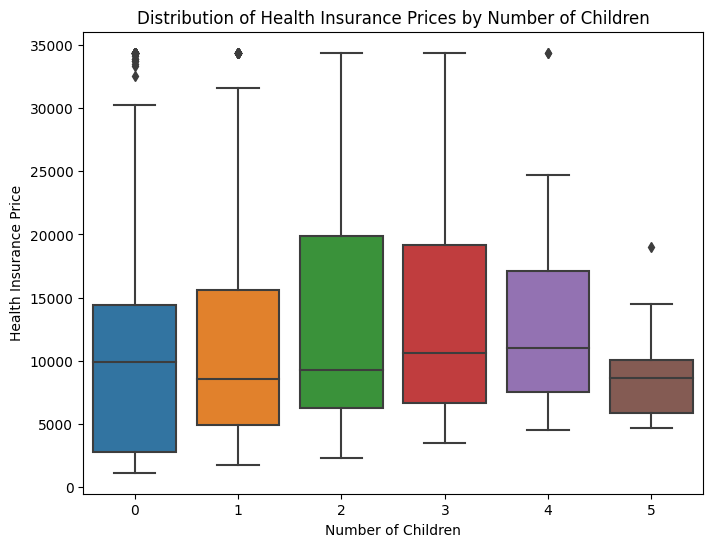

In [19]:
# Creating a boxplot to visualize the distribution of health insurance prices based on the number of children
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Children', y='health_insurance_price')
plt.title('Distribution of Health Insurance Prices by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Health Insurance Price')
plt.show()

In [20]:
# Finding the minimum health insurance price
min_price = df["health_insurance_price"].min()

# Filtering the DataFrame for rows with the minimum health insurance price
min_price_df = df[df["health_insurance_price"] == min_price]

# Counting the occurrences of each value in the "Children" column
children_counts = min_price_df["Children"].value_counts()

print(children_counts)

0    1
Name: Children, dtype: int64


In [21]:
# Finding the maximum health insurance price
max_price = df["health_insurance_price"].max()

# Filtering the DataFrame for rows with the maximum health insurance price
max_price_df = df[df["health_insurance_price"] == max_price]

# Counting the occurrences of each value in the "Children" column
children_counts_max = max_price_df["Children"].value_counts()

print(children_counts_max)



0    54
2    34
1    32
3    19
4     2
Name: Children, dtype: int64


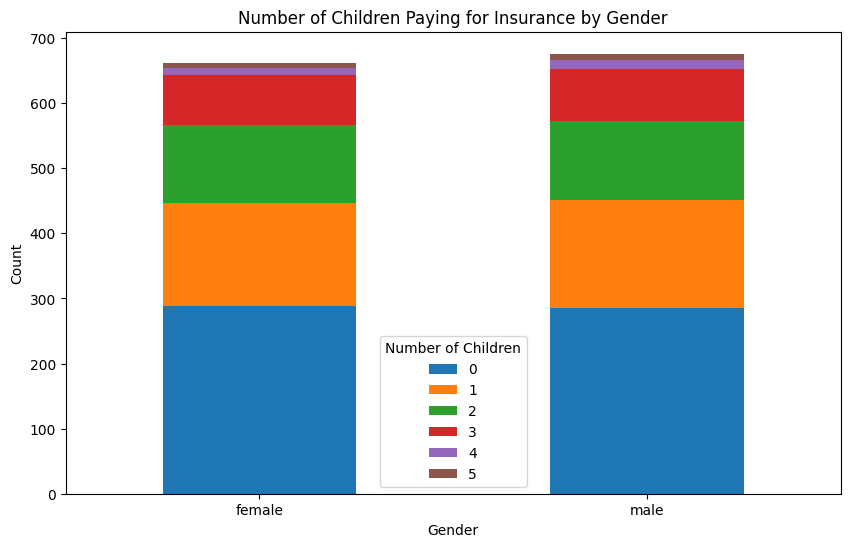

In [22]:
#Checking for health_insurance paid by gender in terms of Children
gender_children_counts = df.groupby('gender')['Children'].value_counts().unstack()

# Plot the bar plot
gender_children_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Children Paying for Insurance by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Number of Children')
plt.show()


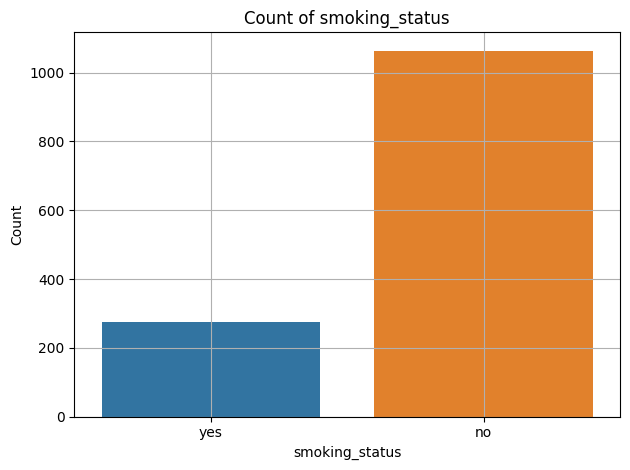

In [23]:
#Exploring Smoker


sns.countplot(data=df,x="smoking_status")
plt.xlabel("smoking_status")
plt.ylabel("Count")
plt.title("Count of smoking_status")
plt.tight_layout()
plt.grid()
plt.show()

#There are more of non smokers as compared to smokers

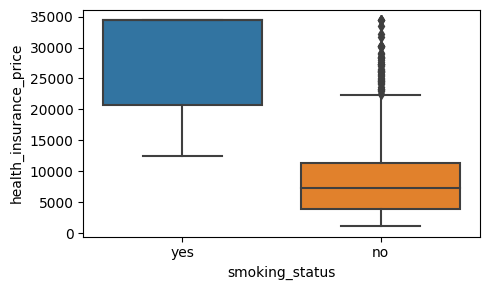

In [24]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df,x="smoking_status",y="health_insurance_price")
plt.tight_layout()
plt.show()


#From the graph we can say that Smokers tend to pay more health insurance price as compared to non smokers

<AxesSubplot: xlabel='location', ylabel='count'>

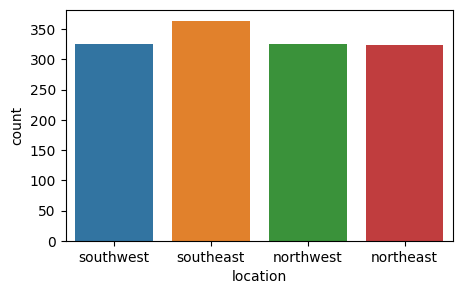

In [25]:
#exploring location

df["location"].value_counts()

plt.figure(figsize=(5,3))
sns.countplot(data=df,x=df["location"])
#southeast location has more number of health_insurance payers as compared to other location

# Hypothesis Testing
Chi-square Test of Independence
Test the hypothesis that the health_insurance_cost of the customers is independent of their gender.

Define Hypothesis

H₀: The two variables are independent & there's no relationship between them.


H₁: The two variables are dependent & there is a relationship between them.

In [26]:
#cChanging the price into different Intervals using pd.cut

bins = [1000, 5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000]
labels = ['1k-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k',]

df['health_insurance_price_group'] = pd.cut(df.health_insurance_price, bins, labels=labels, include_lowest=True)
df.head()


,age,gender,BMI,Children,smoking_status,location,health_insurance_price,health_insurance_price_group
0,19.0,female,30.623559,0,yes,southwest,16884.92400,10k-20k
1,18.0,male,33.770000,1,no,southeast,1725.55230,1k-5k
2,28.0,male,33.000000,3,no,southeast,4449.46200,1k-5k
3,33.0,male,22.705000,0,no,northwest,21984.47061,20k-30k
4,32.0,male,28.880000,0,no,northwest,3866.85520,1k-5k


In [27]:
contingency_table = pd.crosstab(df['gender'], df['health_insurance_price_group'])
contingency_table

health_insurance_price_group,1k-5k,5k-10k,10k-20k,20k-30k,30k-40k
gender,,,,,
female,173,182,193,55,59
male,185,171,162,55,103


In [28]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency_table, correction=False)

print(f'Degrees of freedom: {dof}')
print(f'test stat: {chi2:.4f}')
print(f'p value: {p_value:.4f}')
print()

if p_value > 0.05:
    print('Fail to reject the null hypothesis.')
else:
    print('Reject the null hypothesis.')

Degrees of freedom: 4
test stat: 15.2579
p value: 0.0042

Reject the null hypothesis.


In [29]:
# df.drop(columns=["health_insurance_price_group"],inplace=True)
# df.head(2)

# Observation for Hypothesis:

At this significance level, it can be concluded that

the two variables are dependent & there is a relationship between them..

<div style="background-color: #87CEEB; color: #000; padding: 20px;">
    <h2>Essential Findings as per EDA of Health Insurance Cost</h2>
    <ul>
        <li>Age: Age is directly influencing the health insurance price i.e., higher the age, higher will be the price.</li>
        <li>BMI: BMI is normally distributed with a mean of approximately 30.</li>
        <li>BMI and Health Insurance Cost: There is a positive correlation between BMI and health insurance cost.</li>
        <li>Gender: There is no significant difference between the number of males and females, but males tend to pay the health insurance price more consistently than females.</li>
        <li>Children: People with no children tend to pay more than those with children.</li>
        <li>Smoking: Non-smokers pay less insurance amount compared to smokers.</li>
        <li>Location: The Southeast location has more insurance payers than other locations.</li>
    </ul>
</div>
